In [125]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
from IPython.core.display import HTML 

## Importing the dataset (cutoff and coordinates already fixed)

In [154]:
csv = pd.read_csv('df_masked.csv')

In [156]:
#csv.info()

## Checking for duplicates

In [158]:
#duplicates = [csv.duplicated()]

#print("Duplicate rows:")
#csv.duplicated().sum()

## General analysis : Distribution of features, value counts etc.

/home/josef/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/josef/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/josef/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code

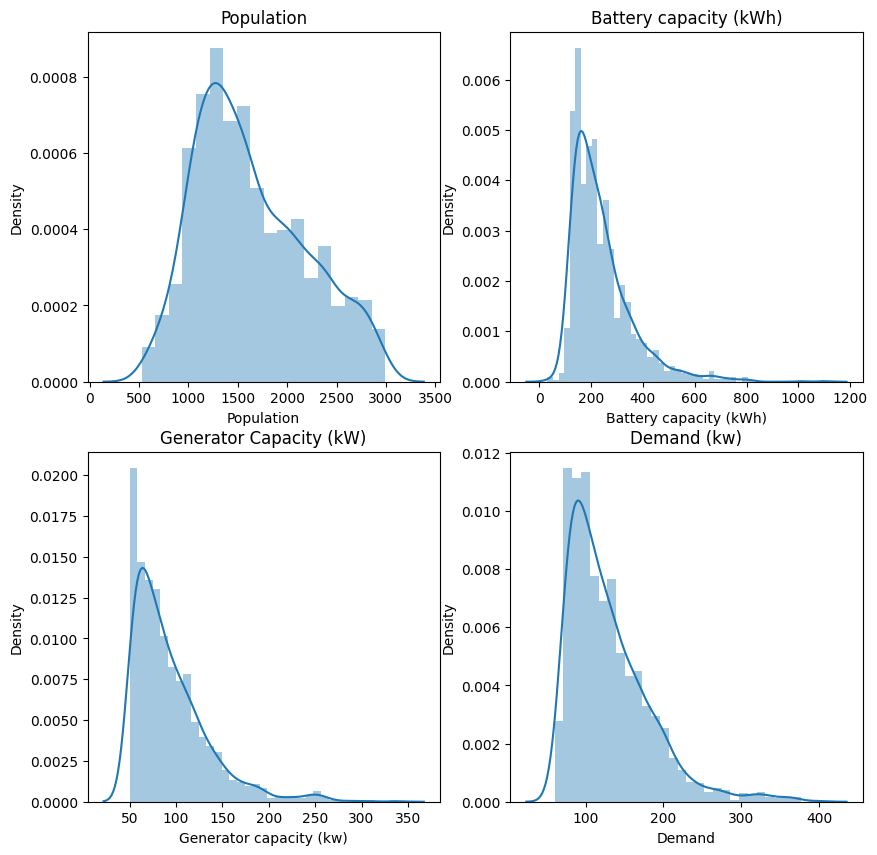

In [16]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

# Plot each distribution on a separate axis
sns.distplot(csv['Population'], ax=axes[0, 0])
sns.distplot(csv['Battery capacity (kWh)'], ax=axes[0, 1])
sns.distplot(csv['Generator capacity (kw)'], ax=axes[1, 0])
sns.distplot(csv['Demand'], ax=axes[1, 1])

# Add titles to each axis
axes[0, 0].set_title('Population')
axes[0, 1].set_title('Battery capacity (kWh)')
axes[1, 0].set_title('Generator Capacity (kW)')
axes[1, 1].set_title('Demand (kw)')

# Display the plot
plt.show()

In [143]:
num_cols = csv.select_dtypes(include=['int', 'float']).columns
csv_num1 = csv.drop(columns=set(csv.columns) - set(num_cols))
csv_num = csv_num1.drop(['Unnamed: 0', 'index', 'Id', 'Lon', 'Lat', 'NESP_ID'], axis =1)

## Feature Creation - per head demand 

In [159]:
csv['Demand_pp'] = csv['Demand'] / csv['Population']
csv

Unnamed: 0  index     Id       Lon        Lat  Country        State  \
0           1654    146  40733  4.742796  13.004795  Nigeria       Sokoto   
1            954    250  38729  8.794116   9.100529  Nigeria      Plateau   
2           1139    435  39400  9.598031   8.457592  Nigeria      Plateau   
3           1338     90  34201  4.450469   6.988445  Nigeria         Ogun   
4             92     92  10451  9.020765   6.159864  Nigeria  Cross River   
...          ...    ...    ...       ...        ...      ...          ...   
1531         259    259  10902  8.695555   6.521745  Nigeria  Cross River   
1532         250    250  10880  8.587898   6.663679  Nigeria  Cross River   
1533         180    180  10670  8.616621   6.126433  Nigeria  Cross River   
1534         299    299  10979  8.330030   5.923116  Nigeria  Cross River   
1535         174    174  10649  9.113515   6.468301  Nigeria  Cross River   

             LGA         Ward   Population  ...  Renewable energy share  \
0         Silame  MARAFA WEST  2995.618570  ...                    66.9   
1         Bokkos         TOFF  2993.034276  ...                    71.9   
2        Shendam        AZARA  2993.034276  ...                    70.8   
3     Ijebu East         OSUN  2982.547845  ...                    68.0   
4           Boki          ABO  2982.404980  ...                    66.2   
...          ...          ...          ...  ...                     ...   
1531       Ogoja   NKUM IBORR   574.247323  ...                    74.7   
1532        Yala      WANIHEM   555.871409  ...                    76.4   
1533        Ikom          NDE   546.683452  ...                    70.5   
1534      Obubra      ABABENE   546.683452  ...                    68.0   
1535       Obudu      ALANKWE   528.307537  ...                    61.9   

     Generator capacity (kw)  PV size(kW)  Battery capacity (kWh)  Demand  \
0                        194          196                     448     279   
1                        151          160                     352     209   
2                        147          188                     392     210   
3                        124          136                     312     178   
4                        261          326                     664     361   
...                      ...          ...                     ...     ...   
1531                      52           64                     168      70   
1532                      52           62                     176      68   
1533                      51           68                     144      70   
1534                      53           60                     120      68   
1535                      51           58                     112      66   

      Electr_type_phase_1  Electr_type_phase_2  Electr_type_phase_3  \
0                    none                 grid                 grid   
1                    none            mini-grid             intercon   
2               mini-grid            mini-grid             intercon   
3                    none                 none                 grid   
4                    none            mini-grid             intercon   
...                   ...                  ...                  ...   
1531                 none                 grid                 grid   
1532                 none                 none                 grid   
1533                 none                 none                 grid   
1534                 none                 none                 grid   
1535                 none            mini-grid             intercon   

     Distance_m Demand_pp  
0          3870  0.093136  
1         36750  0.069829  
2         37260  0.070163  
3         41620  0.059681  
4         20970  0.121043  
...         ...       ...  
1531       3990  0.121899  
1532      10130  0.122330  
1533       1480  0.128045  
1534       7070  0.124386  
1535       6170  0.124927  

[1536 rows x 23 columns]

/home/josef/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<module 'seaborn' from '/home/josef/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/seaborn/__init__.py'>

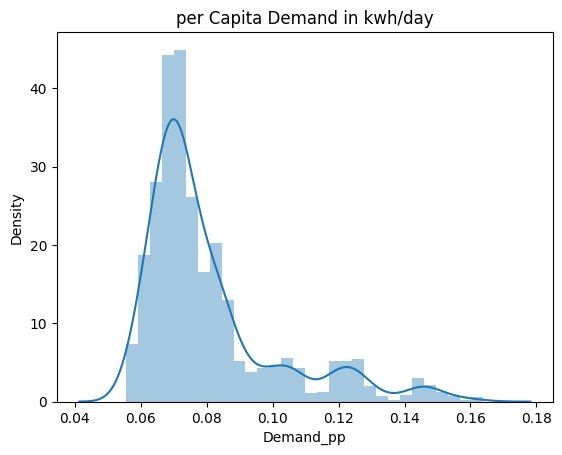

In [160]:
sns.distplot(csv['Demand_pp'], bins= 30).set_title('per Capita Demand in kwh/day')
sns

### Average demand in the dataset (kwh/day) for the population in question in comparison to national consumption average 

In [161]:
mean_demand = csv.Demand_pp.mean()
mean_demand

0.08072998397925767

Average kwh/day/pc consumption in Nigeria is roughly 0.3 kwh/day. This is almost 4x higher than the pC demand in our population. 

### Feature Engineering  : Transforming in kwh/month and categorization in World Bank Tier Model 

Village-level demand per Month

## Household Demand

### Relationship between 'Customers' and 'Population'

/home/josef/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Population per Customer Unit')

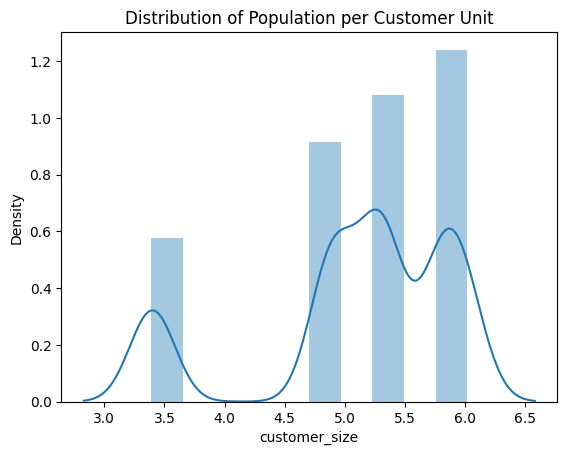

In [162]:
csv['customer_size'] = csv['Population'] / csv['Customers']
sns.distplot(csv['customer_size'], bins = 10).set_title('Distribution of Population per Customer Unit')

In [163]:
csv.value_counts('customer_size')
csv['customer_size'].mean()

5.106429816169782

We assume that 'Customers' equals Household.
Average customer unit size in our sample represents 5.1 person per customer -> this is slightly above the nation average household size of 4.5 Persons / per household, and remains within a plausible range of household size in a rural area. 


## Household demand within the WB Multi-Tier-Framework

/home/josef/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of average Customer Demand (kwh/day)')

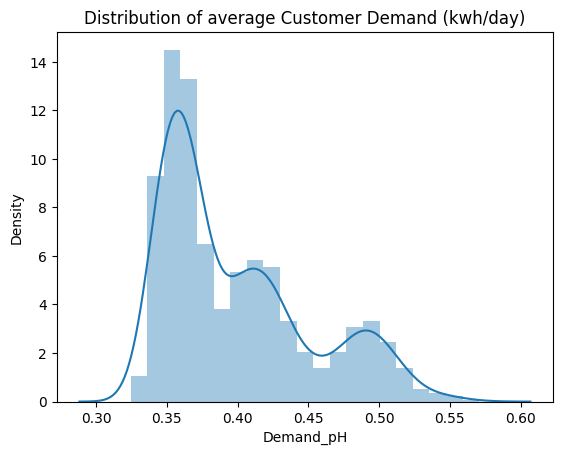

In [164]:
csv['Demand_pH'] = csv['Demand'] / csv['Customers']
sns.distplot(csv['Demand_pH']).set_title('Distribution of average Customer Demand (kwh/day)')

Table: Multi-Tier-Framework (World Bank / Bhatia and Angelou, 2015)

In [165]:
Image(url= "https://mtfenergyaccess.esmap.org/data/files/imce/access_to_electricity.jpg")

/home/josef/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of average Customer Demand (wh/day)')

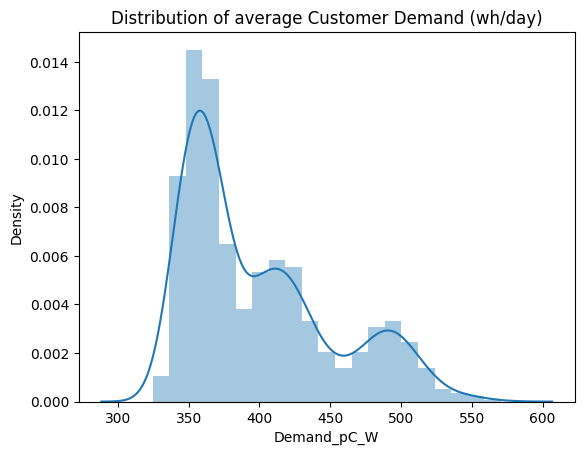

In [166]:
csv['Demand_pC_W'] = (csv['Demand'] / csv['Customers']) * 1000
sns.distplot(csv['Demand_pC_W']).set_title('Distribution of average Customer Demand (wh/day)')

The access to electricity of the given population is low and can be categorized as Tier 2-Energy Consumption within the Multi-Tiers-Framework of the World Bank. Tier-2 Households have 4 to 8 hours of access to electricity and can power low-load appliances such as general lighting, phone charger, TV and a fan. They have about 2 hours of general lighting at night / in the evening. They cannot medium-load appliances such as a fridge, a freezer, a water pump or a rice cooker. Tier-2 consumer energy demands can be met by rechargble batteries, a solar home system. 
Typically, tier-2 classified households experience a minimum of 14 electricity disruptions per week. Due to recurrent voltage problems, electrical appliances in Tier-2 classified households have a much shorter life span. Individuals living in Tier-2 classified households are also more likely to be exposed to serious accidents due to electrical connections.

## Distribution of data points

The sample villages have been collected for 5 different  federal states of Nigeria:
- Cross River
- Niger
- Plateau 
- Ogun
- and Sokoto

In [167]:
import folium



my_map = folium.Map(location=[csv['Lat'][0], csv['Lon'][0]], width=1000, height=1000, zoom_start=8)

# Loop over each row in the DataFrame
for index, row in csv.iterrows():
    # Create a Marker object for each coordinate and add it to the map
    folium.Marker(location=[row['Lat'], row['Lon']], popup=row['Ward']).add_to(my_map)



#folium.Marker(location=[,], popup="").add_to(my_map)

# Display the map
my_map

In [168]:
import folium



my_map = folium.Map(location=[csv['Lon'][0], csv['Lat'][0]], width=1000, height=1000, zoom_start=6)

# Loop over each row in the DataFrame
for index, row in csv.iterrows():
    # Create a Marker object for each coordinate and add it to the map
    folium.Marker(location=[row['Lon'], row['Lat']], popup=row['Ward']).add_to(my_map)



#folium.Marker(location=[,], popup="").add_to(my_map)

# Display the map
my_map

### Data points with the smallest distance from each other (top 10)

In [169]:
from math import sin, cos, sqrt, atan2, radians



def distance(lat1, lon1, lat2, lon2):
    R = 6371 # radius of the earth in km
    dLat = radians(lat2 - lat1)
    dLon = radians(lon2 - lon1)
    a = sin(dLat/2) * sin(dLat/2) + cos(radians(lat1)) * cos(radians(lat2)) * sin(dLon/2) * sin(dLon/2)
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    return R * c

# Define a function to find the two closest spots in the DataFrame
def find_closest_spots(df):
    distances = []
    for i in range(len(df)):
        for j in range(i+1, len(df)):
            d = distance(df.loc[i, 'Lon'], df.loc[i, 'Lat'], df.loc[j, 'Lon'], df.loc[j, 'Lat'])
            distances.append((i, j, d))
    distances.sort(key=lambda x: x[2])
    closest = distances[:10]
    return df.loc[[x[0] for x in closest] + [x[1] for x in closest]]

# Find the two closest spots in the DataFrame
closest_spots = find_closest_spots(csv)

# Create a map centered on the mean latitude and longitude of the closest spots
center_lon = closest_spots['Lon'].mean()
center_lat = closest_spots['Lat'].mean()
my_map2 = folium.Map(location=[center_lat, center_lon], zoom_start=15)

# Add markers for the closest spots to the map
for i, row in closest_spots.iterrows():
    folium.Marker(location=[row['Lat'], row['Lon']], popup=row['Ward']).add_to(my_map2)

# Display the map
my_map2

List of datapoints with the smallest distance between each other (Top 10):

In [170]:
closest_spots.sort_values(by=['Lon'])
#1.09km distance

Unnamed: 0  index     Id       Lon        Lat  Country        State  \
670         1451    203  34703  2.771906   6.652238  Nigeria         Ogun   
504         1278     30  34035  2.782917   6.650762  Nigeria         Ogun   
1193        2024    516  41728  4.948756  13.038825  Nigeria       Sokoto   
1093        2037    529  41813  4.949544  13.048497  Nigeria       Sokoto   
321         1841    333  41149  5.202814  13.512054  Nigeria       Sokoto   
470         2038    530  41817  5.213810  13.507741  Nigeria       Sokoto   
350          238    238  10852  8.501455   6.686801  Nigeria  Cross River   
1144         287    287  10959  8.501533   6.676883  Nigeria  Cross River   
715          211    211  10794  8.694006   6.542775  Nigeria  Cross River   
1477         300    300  10981  8.700598   6.533468  Nigeria  Cross River   
93           919    215  38639  8.721300   9.962953  Nigeria      Plateau   
644         1181    477  39634  8.722799   9.952650  Nigeria      Plateau   
650         1223    519  39786  8.900378   9.439518  Nigeria      Plateau   
665         1198    494  39692  8.906667   9.430332  Nigeria      Plateau   
750         1189    485  39657  9.011832   9.486362  Nigeria      Plateau   
1373        1056    352  39013  9.023471   9.489100  Nigeria      Plateau   
1410         958    254  38742  9.072089   9.700972  Nigeria      Plateau   
1326        1240    536  39931  9.074115   9.688996  Nigeria      Plateau   
1527         104    104  10476  9.272189   6.292933  Nigeria  Cross River   
360          282    282  10939  9.282031   6.295027  Nigeria  Cross River   

               LGA           Ward   Population  ...  Battery capacity (kWh)  \
670         Ipokia       AJEGUNLE  1618.946677  ...                     232   
504         Ipokia  IHUNBO/ ILASE  1853.267907  ...                     152   
1193        Silame         SILAME  1167.665707  ...                     128   
1093        Silame         SILAME  1251.070400  ...                     152   
321       Gawabawa         GIGANE  2130.294876  ...                     256   
470       Gawabawa         GIGANE  1897.456774  ...                     264   
350           Yala            OWO  2076.478320  ...                     408   
1144          Yala            OWO  1208.216367  ...                     224   
715          Ogoja     NKUM IBORR  1575.734654  ...                     448   
1477         Ogoja     NKUM IBORR   817.728188  ...                     200   
93           Bassa         KAKKEK  2666.419058  ...                     368   
644          Bassa         KAKKEK  1641.523031  ...                     224   
650   Barikin Ladi    MARIT/MAZAT  1633.076086  ...                     176   
665   Barikin Ladi         BUTURA  1618.997844  ...                     176   
750   Barikin Ladi    MANGU HALLE  1537.344040  ...                     160   
1373         Mangu    MANGU HALLE  1010.817784  ...                     184   
1410  Barikin Ladi         FURSUM   965.767410  ...                     112   
1326  Barikin Ladi         FURSUM  1050.236862  ...                     136   
1527          Boki        BECHEVE   588.029259  ...                     152   
360           Boki        BECHEVE  2067.290363  ...                     344   

     Demand  Electr_type_phase_1  Electr_type_phase_2  Electr_type_phase_3  \
670     128                 none                 grid                 grid   
504     153            mini-grid             intercon             intercon   
1193     81                 none                 grid                 grid   
1093     88                 none                 grid                 grid   
321     155                 none                 grid                 grid   
470     131                 none                 grid                 grid   
350     252                 none            mini-grid             intercon   
1144    128                 none                 none                 grid   
715     233               

## Correlations

In [171]:
sns.heatmap(csv_num.corr())

NameError: name 'csv_num' is not defined

In [155]:
csv_num.corr()

Population  Customers  Renewable energy share  \
Population                 1.000000   0.858850                0.021313   
Customers                  0.858850   1.000000                0.032382   
Renewable energy share     0.021313   0.032382                1.000000   
Generator capacity (kw)    0.706403   0.873875               -0.164868   
PV size(kW)                0.605478   0.794577               -0.074661   
Battery capacity (kWh)     0.616398   0.777362                0.164536   
Demand                     0.771889   0.936803               -0.107302   
Distance_m                 0.048992  -0.034722                0.025311   

                         Generator capacity (kw)  PV size(kW)  \
Population                              0.706403     0.605478   
Customers                               0.873875     0.794577   
Renewable energy share                 -0.164868    -0.074661   
Generator capacity (kw)                 1.000000     0.947856   
PV size(kW)                             0.947856     1.000000   
Battery capacity (kWh)                  0.894877     0.918440   
Demand                                  0.978636     0.924425   
Distance_m                             -0.079197    -0.079271   

                         Battery capacity (kWh)    Demand  Distance_m  
Population                             0.616398  0.771889    0.048992  
Customers                              0.777362  0.936803   -0.034722  
Renewable energy share                 0.164536 -0.107302    0.025311  
Generator capacity (kw)                0.894877  0.978636   -0.079197  
PV size(kW)                            0.918440  0.924425   -0.079271  
Battery capacity (kWh)                 1.000000  0.879153   -0.066676  
Demand                                 0.879153  1.000000   -0.068257  
Distance_m                            -0.066676 -0.068257    1.000000

High Correlations between Demand and features related to energy capacity point to the issue of Multicollinearity. 

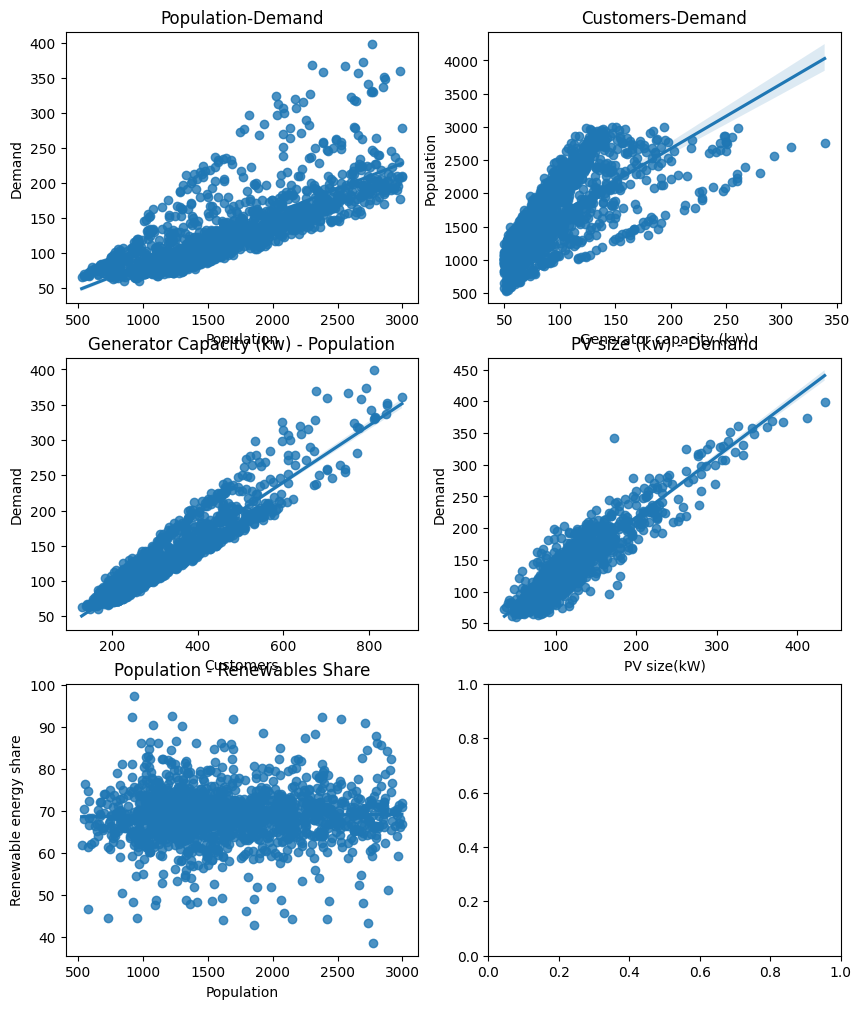

In [23]:
#Regressionplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 12))

# Plot each distribution on a separate axis
sns.regplot(x='Population', y='Demand', data=csv, ax=axes[0, 0])
sns.regplot(x='Customers', y='Demand', data=csv, ax=axes[1, 0])
sns.regplot(x='Generator capacity (kw)', y='Population', data=csv, ax=axes[0, 1])
sns.regplot(x='PV size(kW)', y='Demand', data=csv, ax=axes[1, 1])
sns.regplot(x='Population', y='Renewable energy share', data=csv, ax=axes[2, 0])
# Add titles to each axis
axes[0, 0].set_title('Population-Demand')
axes[0, 1].set_title('Customers-Demand')
axes[1, 0].set_title('Generator Capacity (kw) - Population')
axes[1, 1].set_title('PV size (kw) - Demand')
axes[2, 0].set_title('Population - Renewables Share')
# Display the plot
plt.show()


## Regression Analysis 

### Model 1 : Regressing Demand on Population 

Choice of feature and target
The target of our analysis is the energy demand (which we will assume to be equal to the current consumption) and our CNN-Model will predict the demand in kwh on the basis of a satellite image.

Regressing demand on population size is the only option, given that all other known features are most likely collinear to population size. Also, population size is the feature that is most likely recognisable on a satellite image and such the most 'trainable' feature. 

In [ ]:
import statsmodels.api as sm
Y = csv['Demand']
X = csv['Population']
model = sm.OLS(Y, X).fit() 
model.summary()

### Model 2 : Regressing Demand on Customers

In [ ]:
import statsmodels.formula.api as smf

model2 = smf.ols(formula='Demand ~ Customers + Population', data=csv).fit()
model2.params

In [ ]:
model2.summary()

--> Model 2 : Strong multicollinearity !

## Categorisation of Demand -  3 energy classes

In [ ]:
#csv.Demand.min()
#csv.Demand.max()
#Range from 60 kW to 399 kW

It might be interesting to look at the outcomes of a logistic regression and to design the target in a categorical way. It would help to group villages according to their current energy consumption level and help decision makers to prioritize investment decisions in a clear and simple manner. 
As shown in chapter 5, average household energy demand of the sample villages are all within Tier-2. The overall target would be to move all these villages to an average Tier-2-Consumption level. Nevertheless, we can distinguish within the sample relatively high divergence between many low-Tier-2 villages and medium to high Tier-2-villages. We therefor propose 2 threshold models, with respectively 2 and 3 thresholds / categories.

### Categorization - Target engineering with 3 Categories 

In [201]:
# 3 cuts
thresholds3 = [0, 50, 100,200,400]

# create the labels for the bins
labels3 = [1, 2, 3,4]

# create a new column called 'label_encoded'
csv['demand_cat_3'] = pd.cut(csv['Demand'], bins=thresholds3, labels=labels3)

### Categorization - Target engineering with 2 Categories 

In [173]:
#2 Cuts
thresholds2 = [0, 150, 400]

# create the labels for the bins
labels2 = [1, 2]

# create a new column called 'label_encoded'
csv['demand_cat_2'] = pd.cut(csv['Demand'], bins=thresholds2, labels=labels2)



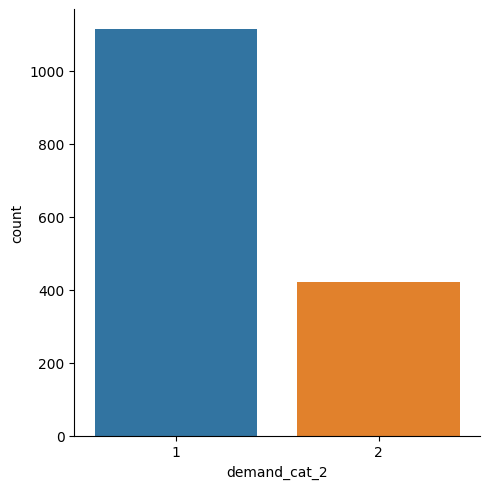

In [190]:
sns.catplot(data=csv, x="demand_cat_2", kind="count")

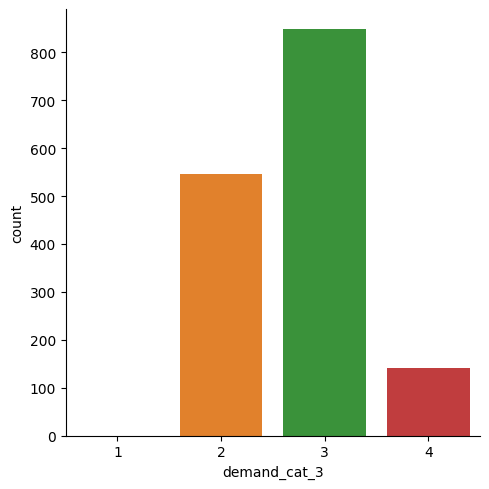

In [202]:
sns.catplot(data=csv, x='demand_cat_3', kind='count')

In [228]:
csv['demand_cat_3'].value_counts()

3    848
2    546
4    142
1      0
Name: demand_cat_3, dtype: int64

### Exporting labeled y-data frame (thresholds 0,50,100,200,400)

In [214]:
y_cat3 = pd.DataFrame(csv['Id'], csv['demand_cat_3'])
y_cat3

Id
demand_cat_3       
4             10451
4             10451
4             10451
3             34201
4             10451
...             ...
2             39400
2             39400
2             39400
2             39400
2             39400

[1536 rows x 1 columns]

In [217]:
y_cat3

Id
demand_cat_3       
4             10451
4             10451
4             10451
3             34201
4             10451
...             ...
2             39400
2             39400
2             39400
2             39400
2             39400

[1536 rows x 1 columns]

In [210]:
y_cat3.to_csv('data/y_cat3.csv')

### Adding Categories also to original df

In [225]:
df_masked_cat = pd.read_csv('df_masked.csv')

In [226]:
df_masked_cat3 = pd.concat([df_masked_cat, csv['demand_cat_3']], axis = 1)

In [227]:
df_masked_cat3.to_csv('data/df_masked_cat3.csv')

In [92]:
csv.value_counts(['demand_cat_3'])

demand_cat_3
1               1114
2                398
3                 24
dtype: int64

In [93]:
csv.value_counts(['demand_cat_2'])

demand_cat_2
1               1114
2                422
dtype: int64

In [153]:
csv

Unnamed: 0  index     Id       Lon        Lat  Country        State  \
0           1654    146  40733  4.742796  13.004795  Nigeria       Sokoto   
1            954    250  38729  8.794116   9.100529  Nigeria      Plateau   
2           1139    435  39400  9.598031   8.457592  Nigeria      Plateau   
3           1338     90  34201  4.450469   6.988445  Nigeria         Ogun   
4             92     92  10451  9.020765   6.159864  Nigeria  Cross River   
...          ...    ...    ...       ...        ...      ...          ...   
1531         259    259  10902  8.695555   6.521745  Nigeria  Cross River   
1532         250    250  10880  8.587898   6.663679  Nigeria  Cross River   
1533         180    180  10670  8.616621   6.126433  Nigeria  Cross River   
1534         299    299  10979  8.330030   5.923116  Nigeria  Cross River   
1535         174    174  10649  9.113515   6.468301  Nigeria  Cross River   

             LGA         Ward   Population  ...  Electr_type_phase_1  \
0         Silame  MARAFA WEST  2995.618570  ...                 none   
1         Bokkos         TOFF  2993.034276  ...                 none   
2        Shendam        AZARA  2993.034276  ...            mini-grid   
3     Ijebu East         OSUN  2982.547845  ...                 none   
4           Boki          ABO  2982.404980  ...                 none   
...          ...          ...          ...  ...                  ...   
1531       Ogoja   NKUM IBORR   574.247323  ...                 none   
1532        Yala      WANIHEM   555.871409  ...                 none   
1533        Ikom          NDE   546.683452  ...                 none   
1534      Obubra      ABABENE   546.683452  ...                 none   
1535       Obudu      ALANKWE   528.307537  ...                 none   

     Electr_type_phase_2  Electr_type_phase_3  Distance_m  Demand_pp  \
0                   grid                 grid        3870   0.093136   
1              mini-grid             intercon       36750   0.069829   
2              mini-grid             intercon       37260   0.070163   
3                   none                 grid       41620   0.059681   
4              mini-grid             intercon       20970   0.121043   
...                  ...                  ...         ...        ...   
1531                grid                 grid        3990   0.121899   
1532                none                 grid       10130   0.122330   
1533                none                 grid        1480   0.128045   
1534                none                 grid        7070   0.124386   
1535           mini-grid             intercon        6170   0.124927   

      demand_cat_3  demand_cat_2  customer_size Demand_pH Demand_pC_W  
0                2             2       4.902813  0.456628  456.628478  
1                2             2       5.297406  0.369912  369.911504  
2                2             2       5.297406  0.371681  371.681416  
3                2             2       6.001102  0.358149  358.148893  
4                3             2       3.400690  0.411631  411.630559  
...            ...           ...            ...       ...         ...  
1531             1             1       3.397913  0.414201  414.201183  
1532             1             1       3.410254  0.417178  417.177914  
1533             1             1       3.395549  0.434783  434.782609  
1534             1             1       3.395549  0.422360  422.360248  
1535             1             1       3.408436  0.425806  425.806452  

[1536 rows x 28 columns]